<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Plotting-Routine" data-toc-modified-id="Plotting-Routine-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting Routine</a></span></li><li><span><a href="#Load-Empirical-Data" data-toc-modified-id="Load-Empirical-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Empirical Data</a></span></li><li><span><a href="#Generate-Random-Call-Data" data-toc-modified-id="Generate-Random-Call-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate Random Call Data</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Import Libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import numpy as np
import random

# Plotting Routine

In [2]:
def plotOverTime(data=None, f=None, 
                 title=None, xlabel=None, ylabel=None):
    fig = plt.figure()
    fig.set_figwidth(12)
    fig.set_figheight(5)
    ax = fig.gca()
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.set_xlim(0, 24)
    plt.xticks(ticks=range(24))
    if title is not None:
        ax.set_title(title)
    if data is not None:
        plt.hist(data, bins=np.linspace(0,24,25))
    if f is not None:
        X=np.linspace(0, 24, 1000)
        Y=[f(x) for x in X]
        plt.plot(X, Y, 'r-')

# Load Empirical Data

The file `Calls.csv` contains the number of calls per hour recorded over a typical day.

In [3]:
callData = pd.read_csv('Calls.csv')
callData

,Hour,Calls
0,0,60
1,1,30
2,2,18
3,3,12
4,4,12
5,5,30
6,6,60
7,7,120
8,8,420
9,9,600


In [17]:
math.floor(23.5%24)

23

In [4]:
def arrivals(x):
    x = x%24
    return callData.at[int(math.floor(x)),'Calls']

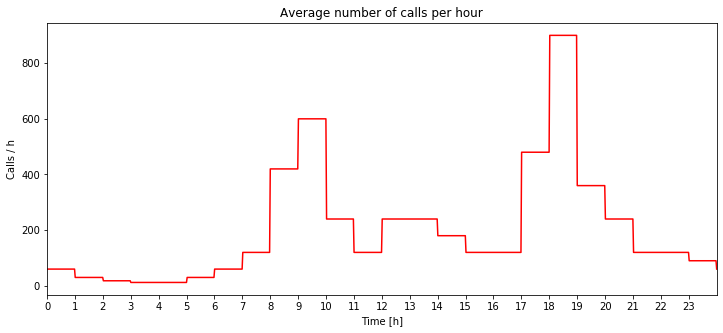

In [5]:
plotOverTime(f=arrivals, 
             xlabel='Time [h]', ylabel='Calls / h', 
             title="Average number of calls per hour")

# Generate Random Call Data

`callData` generates 24h of call data, the interarrival time of which varies over time according to the function f that returns the average number of calls per hour. The call length is normally distribution with the mean `length` and coefficient of variation `cv`.

In [6]:
def calls(f, length, cv, days=1):
    call, time, iat, lgt = [], [], [], []
    no = 0
    t = 0
    while t<24*days:
        dt = stats.expon(scale = 1/f(t)).rvs()
        cl = stats.norm.rvs(loc=length/3600, scale=length/3600*cv)
        t += dt
        no += 1
        if t<24*days:
            call.append(no)
            time.append(t%24)
            iat.append(dt)
            lgt.append(cl)

    return call, time, iat, lgt


random.seed(0)
call, time, iat, lgt = calls(arrivals, 90, 0.1)
Calls=pd.DataFrame(index=call)
Calls['time']=time
Calls['iat']=iat
Calls['lgt']=lgt

In [7]:
len(Calls)

4956

In [8]:
Calls

,time,iat,lgt
1,0.003230,0.003230,0.026511
2,0.019957,0.016727,0.024240
3,0.022212,0.002255,0.022741
4,0.036184,0.013971,0.026766
5,0.036258,0.000074,0.021620
...,...,...,...
4952,23.962044,0.016877,0.024086
4953,23.967183,0.005139,0.023490
4954,23.968444,0.001261,0.025835
4955,23.983299,0.014854,0.024321


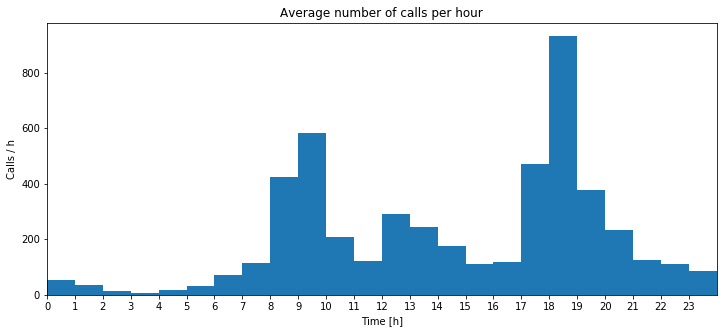

In [9]:
plotOverTime(data=Calls['time'],
             xlabel='Time [h]', ylabel='Calls / h', 
             title=f"Average number of calls per hour")

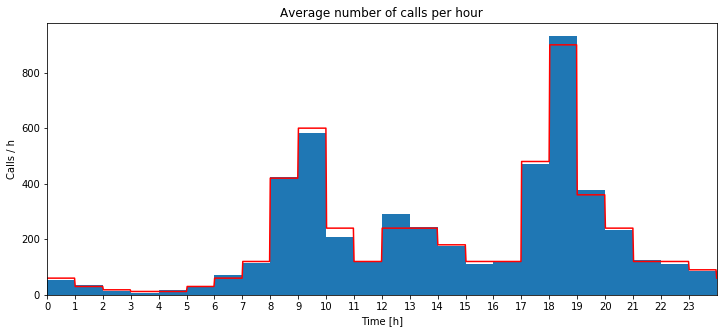

In [10]:
plotOverTime(data=Calls['time'], f=arrivals, 
             xlabel='Time [h]', ylabel='Calls / h', 
             title=f"Average number of calls per hour")

# References

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)